# Demostración Integral: Detección de Regiones Brillantes (Lámparas)

## Objetivo
Implementar y comparar múltiples algoritmos de visión computacional para la detección automática de lámparas en imágenes, demostrando la efectividad de diferentes enfoques técnicos.

## Algoritmos Implementados
1. **Pipeline Principal**: Detección integral con umbral adaptativo
2. **Comparación de Umbrales**: Fijo vs Adaptativo vs Otsu
3. **Filtros de Pre-procesamiento**: Gaussian Blur y reducción de ruido
4. **Operaciones Morfológicas**: Apertura, cierre y refinamiento
5. **Segmentación Avanzada**: K-means y crecimiento de regiones
6. **Análisis Cuantitativo**: Métricas de área, perímetro y centroide

In [1]:
# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from sklearn.cluster import KMeans
import os

# Configuración de matplotlib
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png', '../image/5.jpg', '../image/6.jpg', '../image/7.jpg']

# Crear directorio de resultados
os.makedirs('../image/resultados/demostracion/', exist_ok=True)

print("✅ Librerías cargadas correctamente")
print(f"📁 Procesaremos {len(imagenes)} imágenes")

✅ Librerías cargadas correctamente
📁 Procesaremos 7 imágenes


## 1. ALGORITMO PRINCIPAL: Pipeline Integral de Detección

Este es nuestro algoritmo estrella que combina múltiples técnicas optimizadas específicamente para la detección de lámparas.

🔍 DETECCIÓN DE REGIONES ILUMINADAS CON UMBRALIZACIÓN DE OTSU

📸 Procesando imagen 1: ../image/1.png


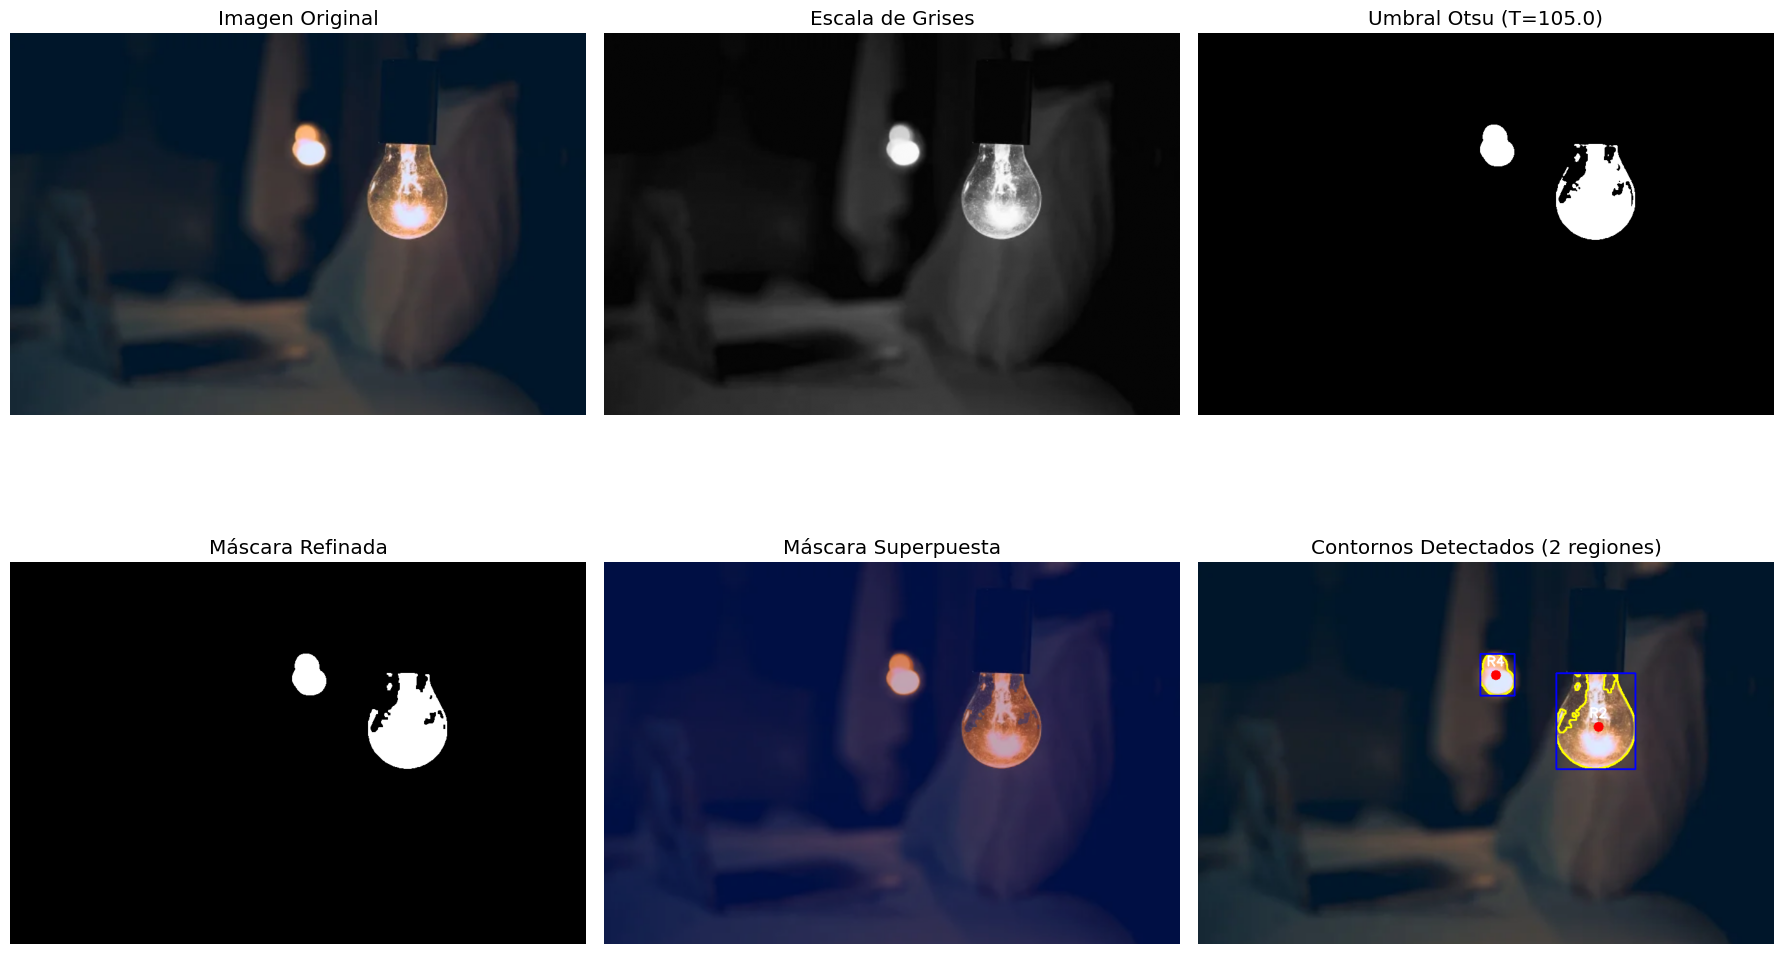

✅ Detectadas 2 regiones iluminadas:
   R2: Área=12474, Perímetro=661.9, Centro=(643, 264)
   R4: Área=2665, Perímetro=202.2, Centro=(478, 181)

📸 Procesando imagen 2: ../image/2.png


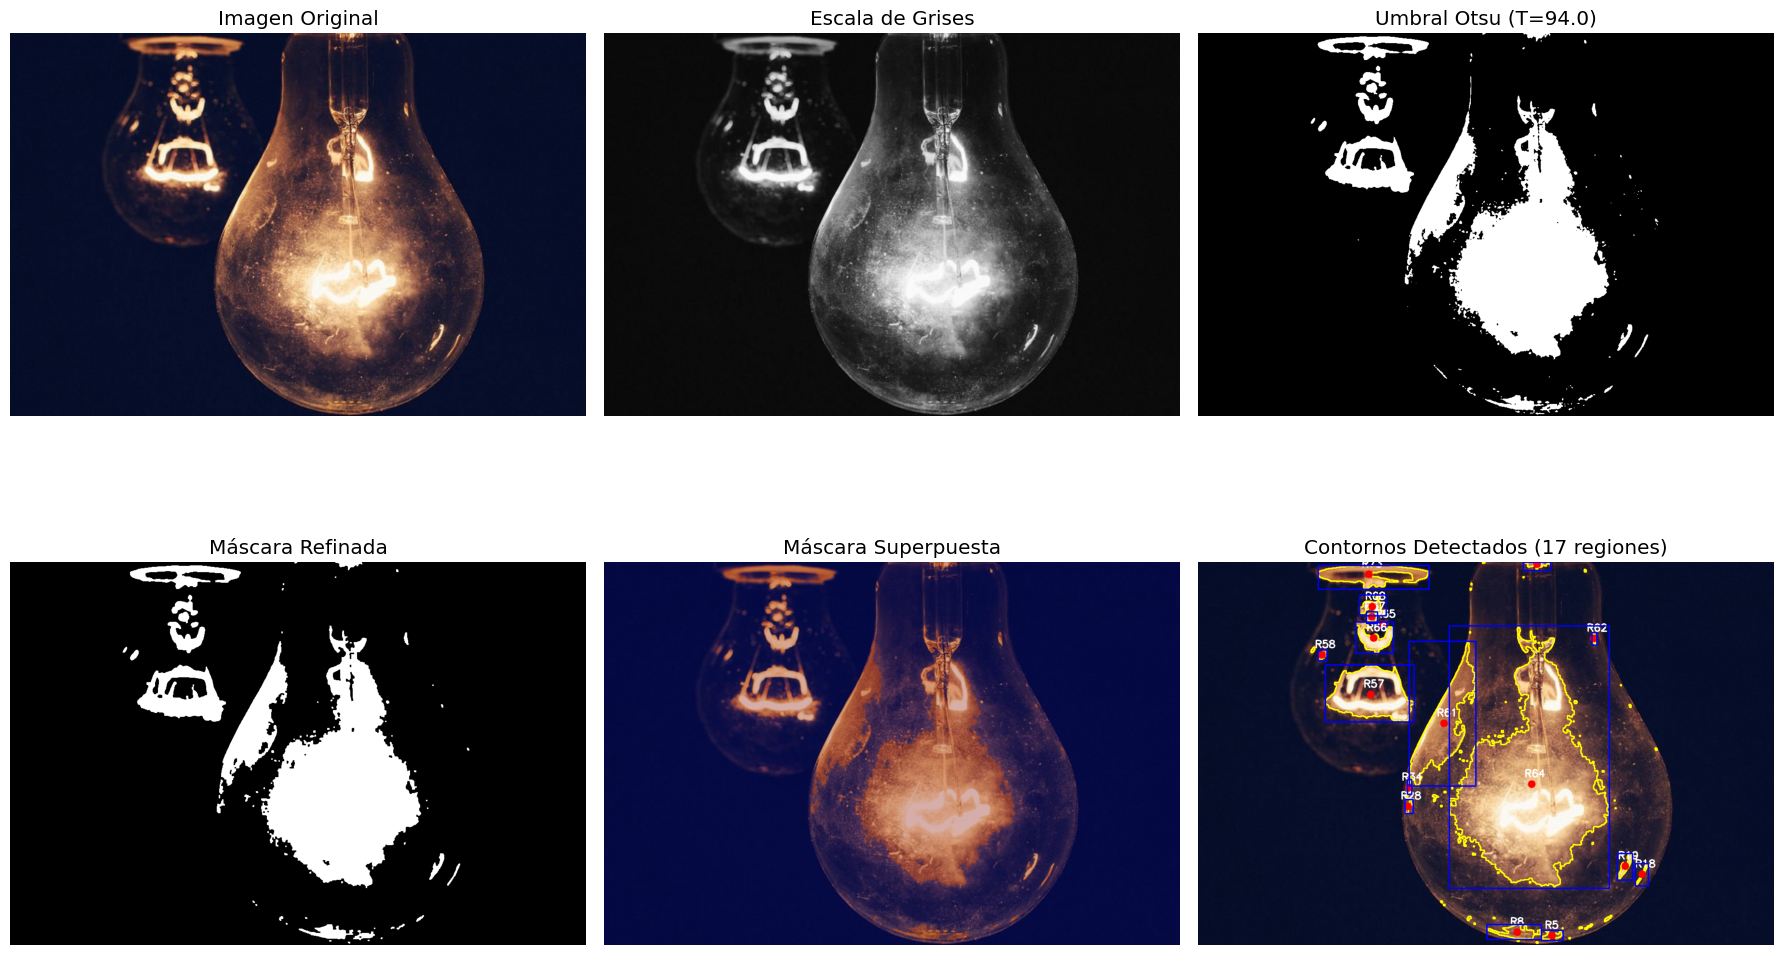

✅ Detectadas 17 regiones iluminadas:
   R5: Área=398, Perímetro=134.2, Centro=(734, 774)
   R8: Área=1520, Perímetro=329.9, Centro=(662, 767)
   R18: Área=171, Perímetro=113.9, Centro=(921, 647)
   R19: Área=504, Perímetro=157.0, Centro=(886, 630)
   R28: Área=176, Perímetro=84.0, Centro=(435, 506)
   ... y 12 regiones más

📸 Procesando imagen 3: ../image/3.png


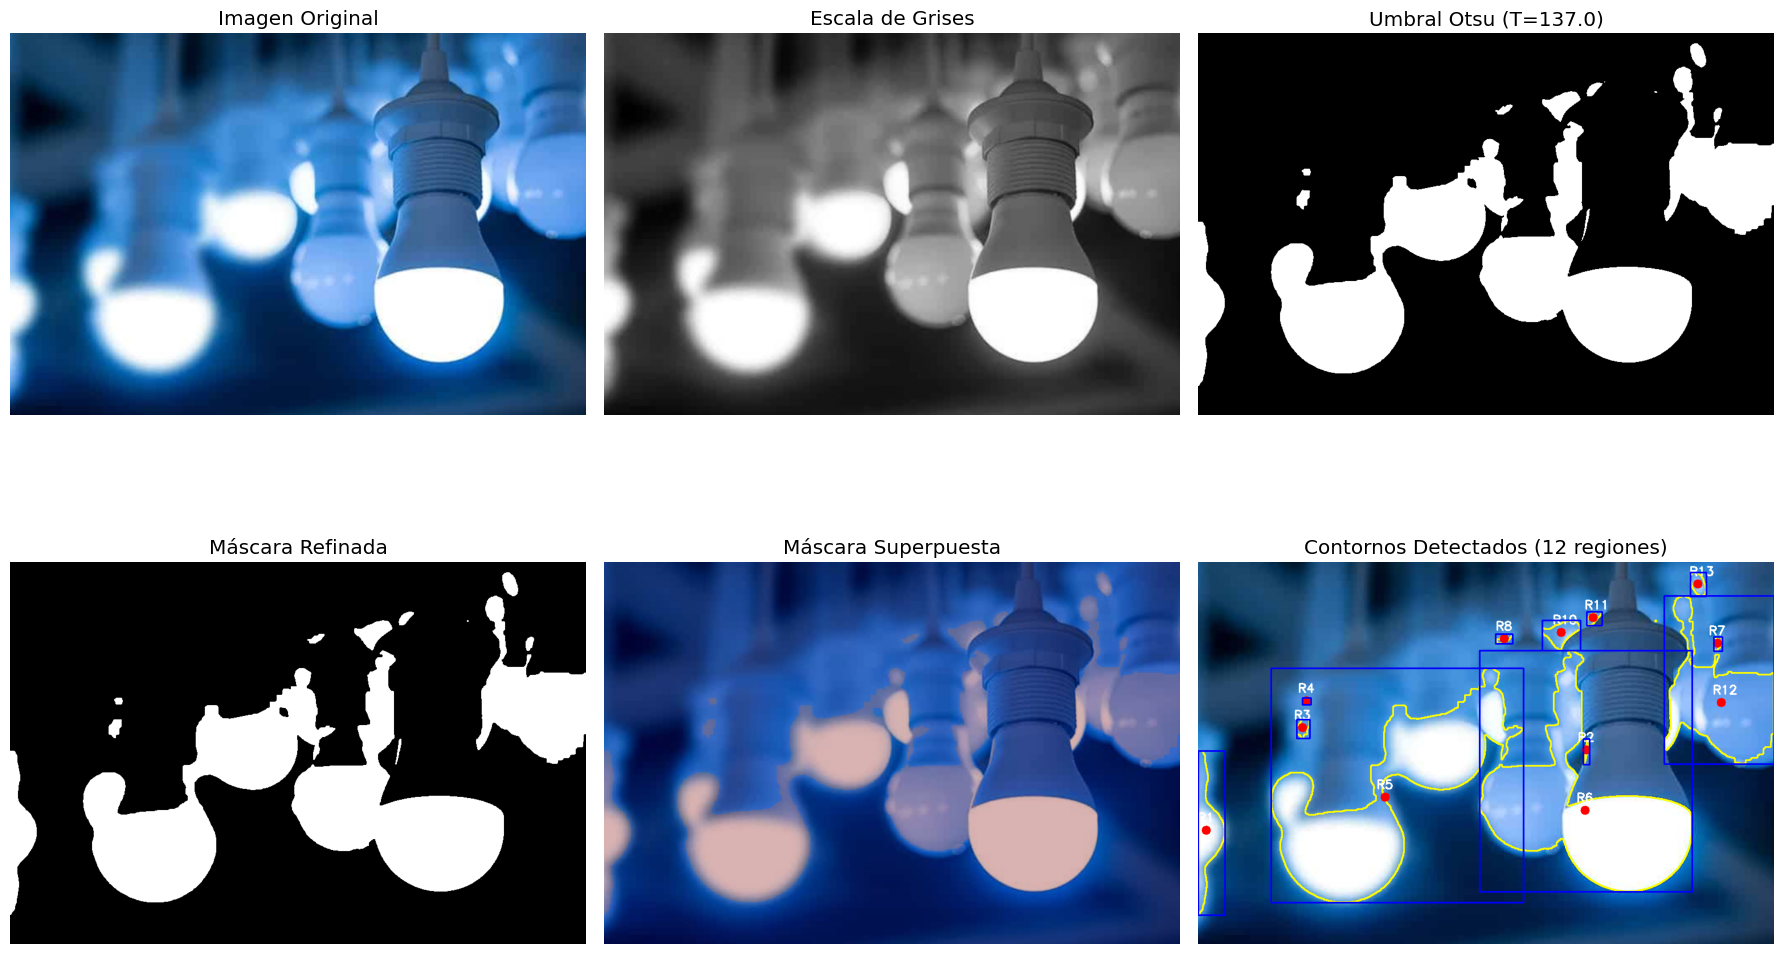

✅ Detectadas 12 regiones iluminadas:
   R1: Área=6132, Perímetro=623.2, Centro=(14, 470)
   R2: Área=133, Perímetro=98.6, Centro=(681, 329)
   R3: Área=500, Perímetro=95.7, Centro=(183, 290)
   R4: Área=132, Perímetro=44.7, Centro=(190, 243)
   R5: Área=62474, Perímetro=1916.7, Centro=(328, 412)
   ... y 7 regiones más

📸 Procesando imagen 4: ../image/4.png


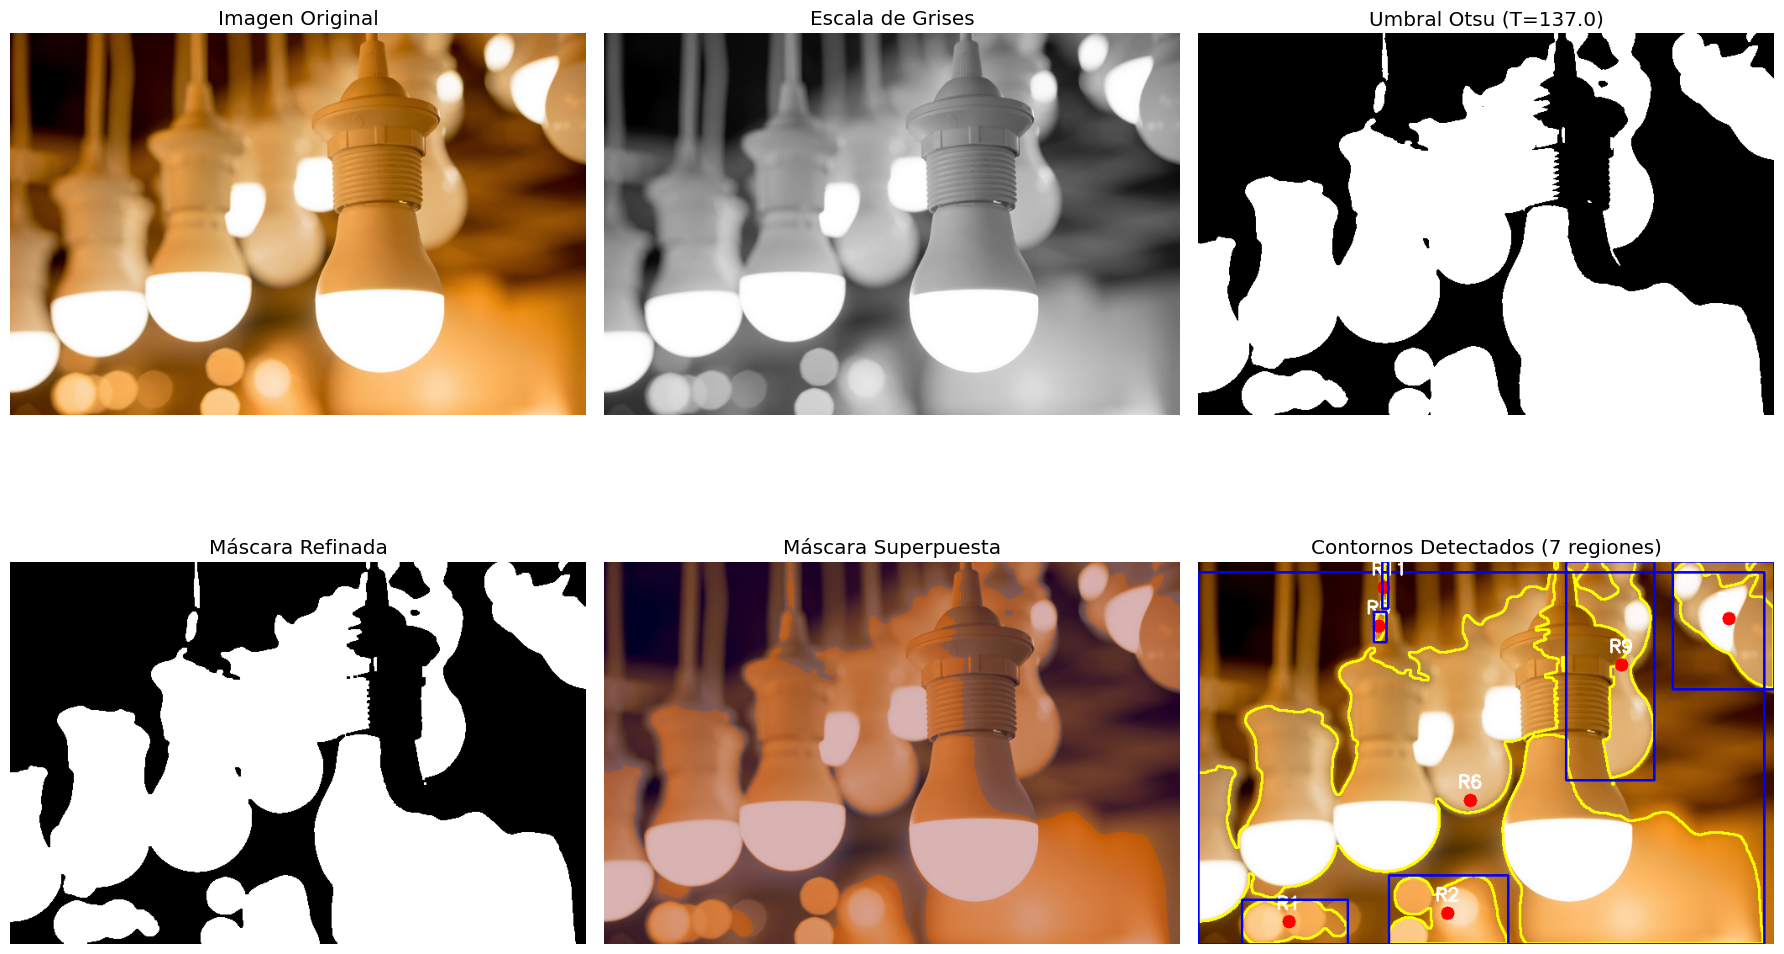

✅ Detectadas 7 regiones iluminadas:
   R1: Área=4753, Perímetro=328.2, Centro=(108, 428)
   R2: Área=8679, Perímetro=539.0, Centro=(297, 418)
   R5: Área=334, Perímetro=85.7, Centro=(215, 77)
   R6: Área=129207, Perímetro=3432.9, Centro=(324, 284)
   R8: Área=10334, Perímetro=504.0, Centro=(632, 68)
   ... y 2 regiones más

📸 Procesando imagen 5: ../image/5.jpg


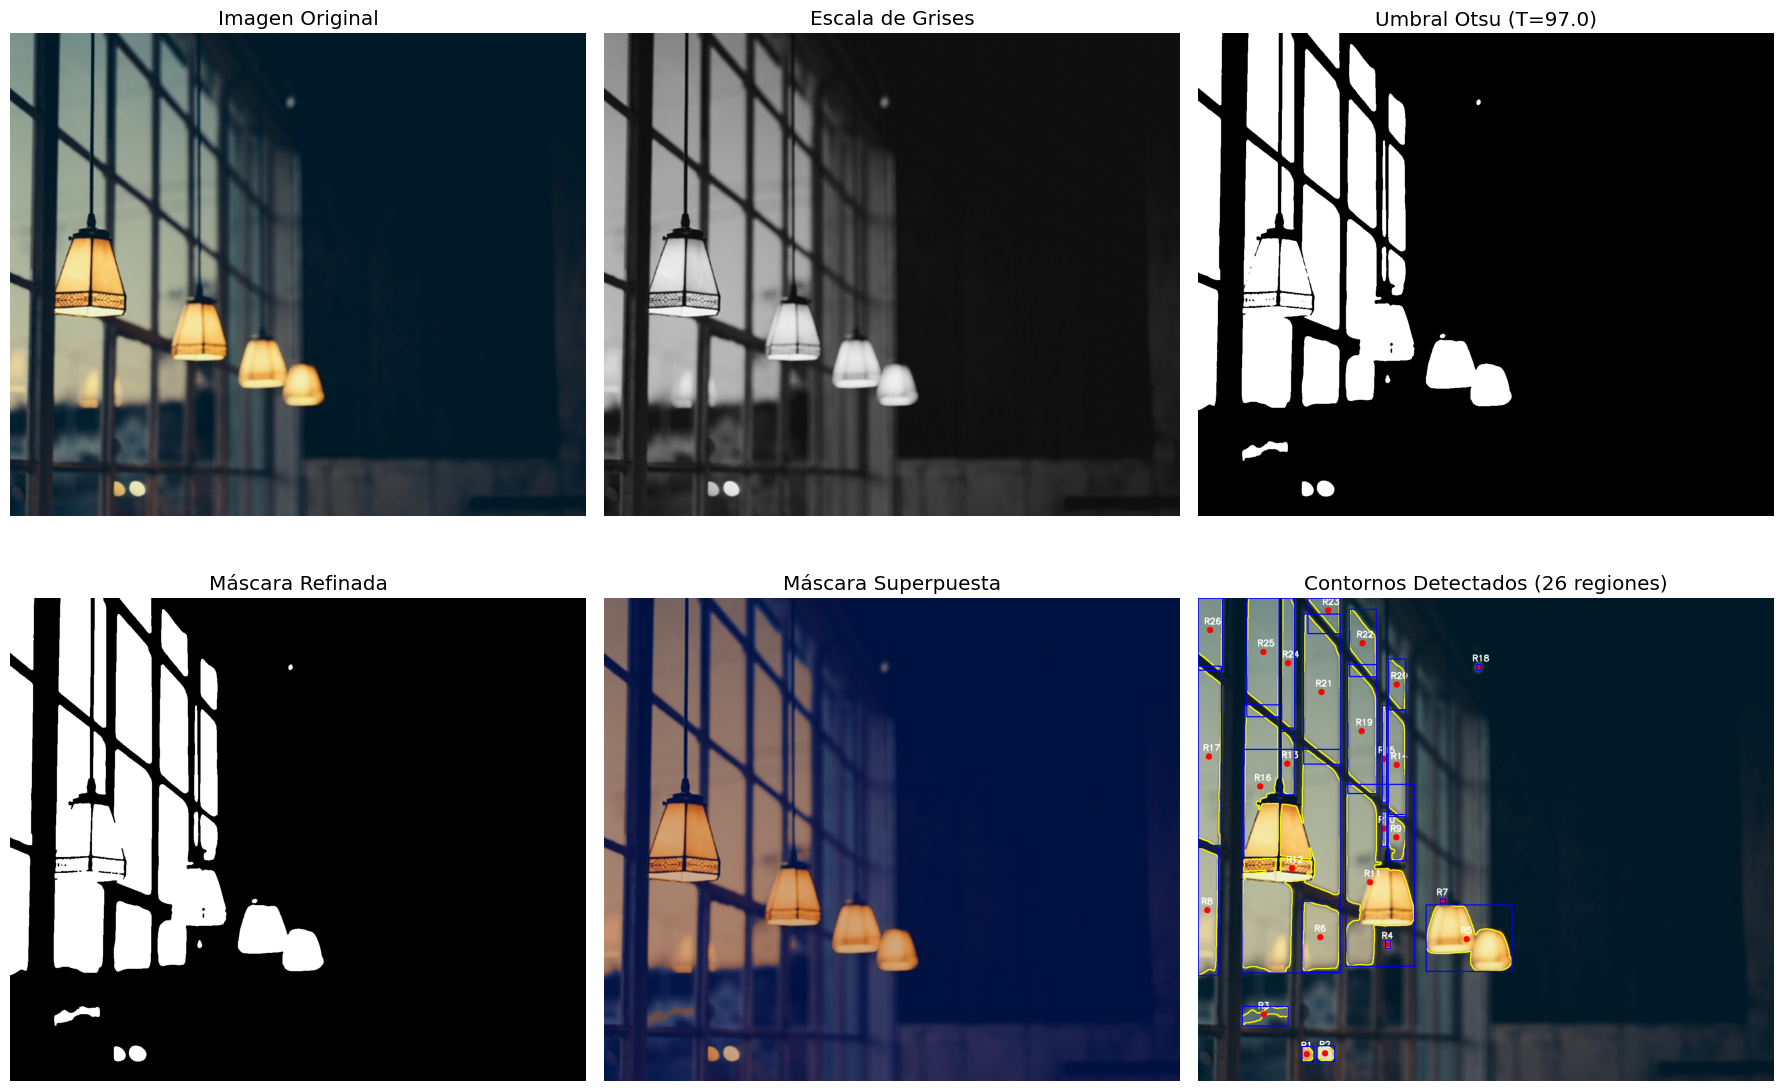

✅ Detectadas 26 regiones iluminadas:
   R1: Área=864, Perímetro=115.0, Centro=(273, 1146)
   R2: Área=1338, Perímetro=137.1, Centro=(319, 1144)
   R3: Área=2308, Perímetro=312.2, Centro=(165, 1046)
   R4: Área=156, Perímetro=50.6, Centro=(476, 870)
   R5: Área=21194, Perímetro=711.3, Centro=(675, 857)
   ... y 21 regiones más

📸 Procesando imagen 6: ../image/6.jpg


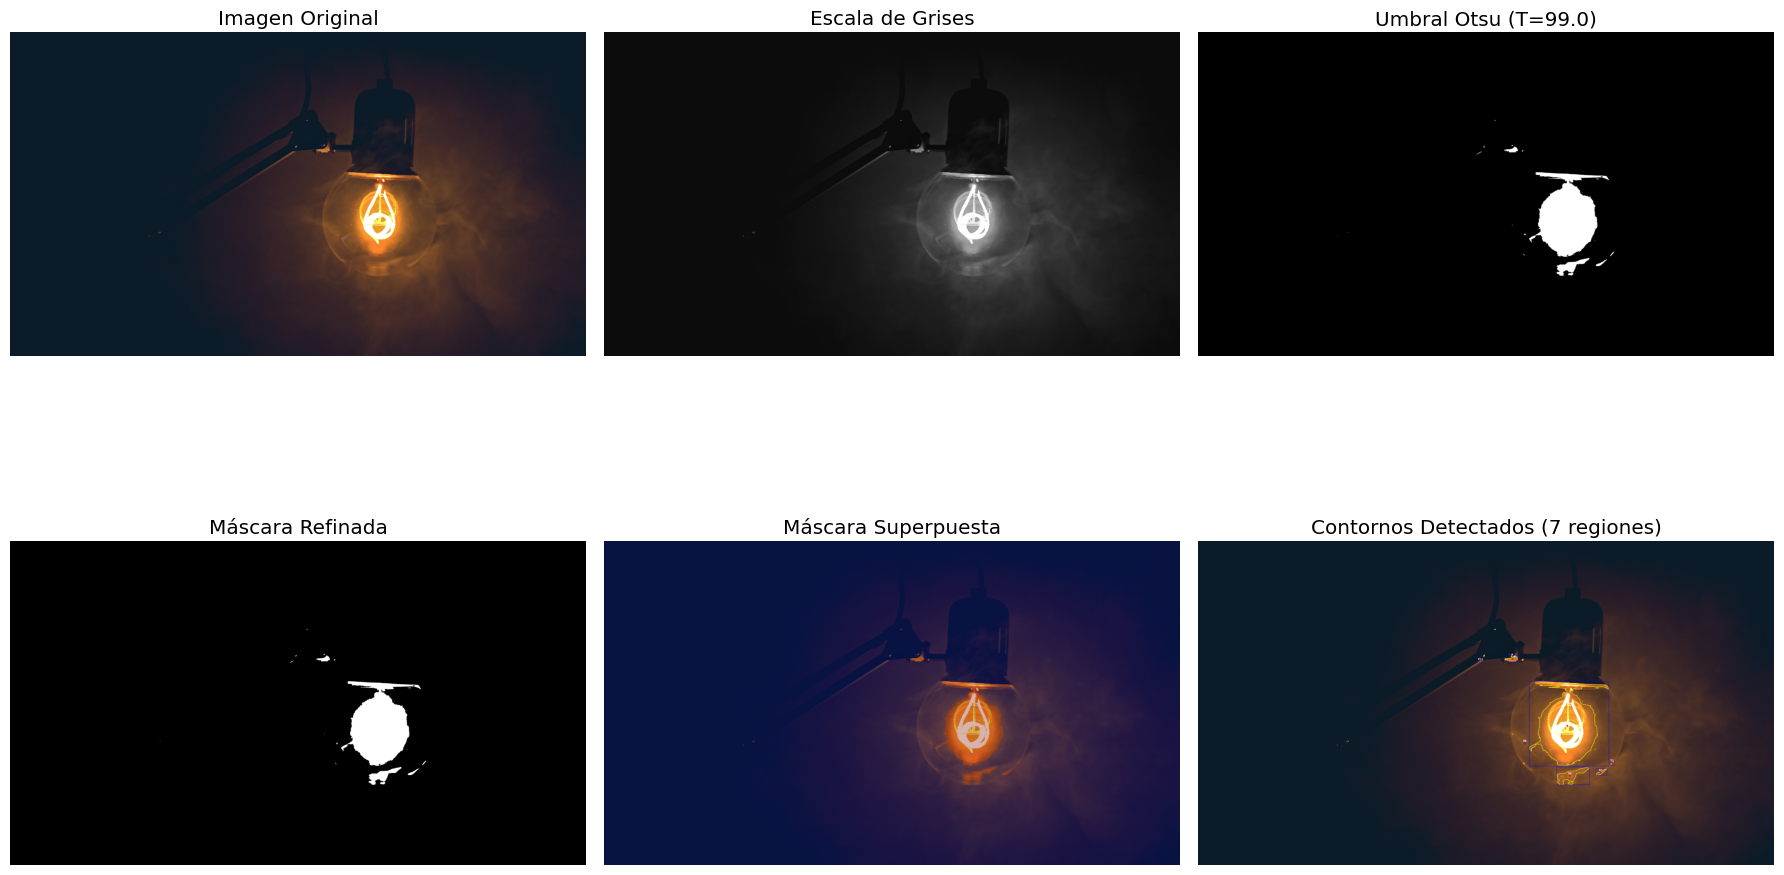

✅ Detectadas 7 regiones iluminadas:
   R1: Área=1602, Perímetro=264.6, Centro=(3624, 2083)
   R2: Área=17812, Perímetro=1075.4, Centro=(3347, 2113)
   R4: Área=349, Perímetro=115.9, Centro=(3727, 1996)
   R6: Área=106, Perímetro=55.6, Centro=(2942, 1821)
   R13: Área=277208, Perímetro=4452.8, Centro=(3324, 1663)
   ... y 2 regiones más

📸 Procesando imagen 7: ../image/7.jpg


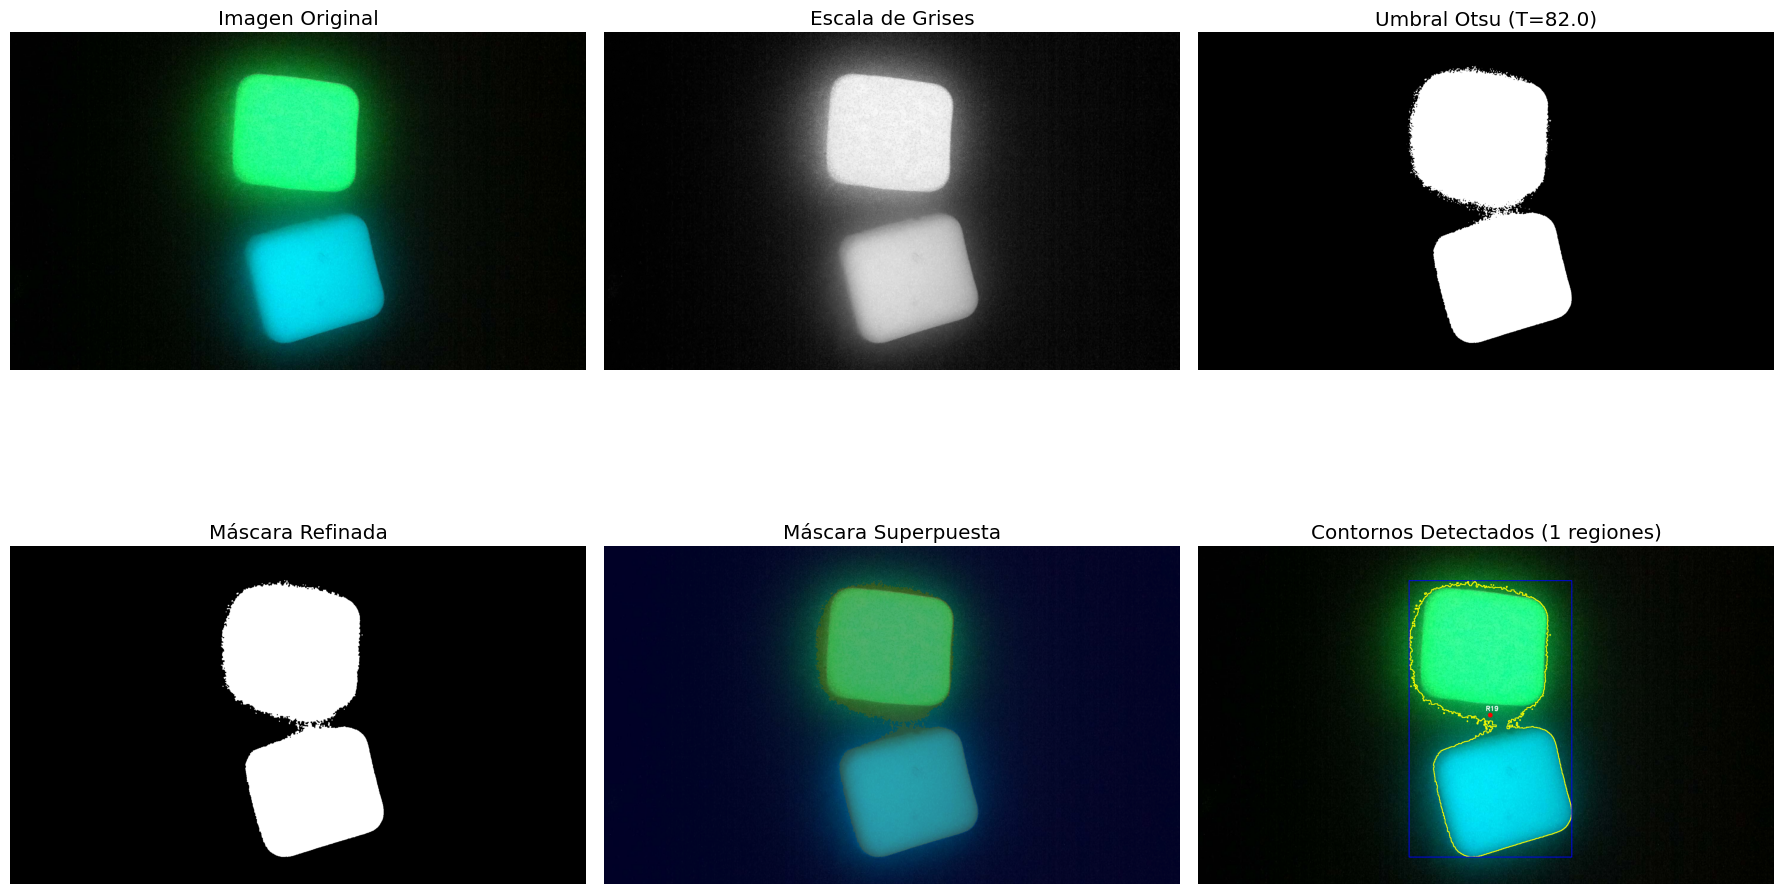

✅ Detectadas 1 regiones iluminadas:
   R19: Área=336810, Perímetro=4167.3, Centro=(982, 568)

🎯 RESUMEN: Detección Otsu completada para 7 imágenes


In [2]:
def detectar_lamparas_otsu_contornos(imagen_path, mostrar_pasos=True):
    """
    Aplica umbralización de Otsu para identificar regiones iluminadas
    y muestra contornos superpuestos en la imagen original
    """
    # 1. Cargar imagen
    img_color = cv2.imread(imagen_path)
    if img_color is None:
        return None, None
    
    # 2. Convertir a escala de grises
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    # 3. Suavizado gaussiano para reducir ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 4. Umbralización de Otsu
    otsu_threshold, otsu_binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 5. Operaciones morfológicas para limpiar la máscara
    kernel = np.ones((3, 3), np.uint8)
    otsu_cleaned = cv2.morphologyEx(otsu_binary, cv2.MORPH_OPEN, kernel)
    otsu_cleaned = cv2.morphologyEx(otsu_cleaned, cv2.MORPH_CLOSE, kernel)
    
    # 6. Encontrar contornos de las regiones iluminadas
    contours, _ = cv2.findContours(otsu_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 7. Crear imagen resultado con contornos superpuestos
    result = img_color.copy()
    
    # Superponer máscara con transparencia
    mask_colored = cv2.applyColorMap(otsu_cleaned, cv2.COLORMAP_JET)
    result_with_mask = cv2.addWeighted(result, 0.7, mask_colored, 0.3, 0)
    
    # Dibujar contornos en la imagen original
    cv2.drawContours(result, contours, -1, (0, 255, 255), 2)  # Contornos amarillos
    
    # 8. Filtrar y etiquetar regiones significativas
    regiones_detectadas = []
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if area >= 100:  # Filtrar regiones pequeñas
            # Calcular centroide
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                
                # Dibujar centroide y etiqueta
                cv2.circle(result, (cx, cy), 8, (0, 0, 255), -1)  # Punto rojo
                cv2.putText(result, f'R{i+1}', (cx-15, cy-15), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                
                # Calcular bounding box
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(result, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Rectángulo azul
                
                regiones_detectadas.append({
                    'id': i+1,
                    'area': area,
                    'centroide': (cx, cy),
                    'bbox': (x, y, w, h),
                    'perimetro': cv2.arcLength(contour, True)
                })
    
    if mostrar_pasos:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Fila superior: proceso de umbralización
        axes[0,0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
        axes[0,0].set_title('Imagen Original')
        axes[0,0].axis('off')
        
        axes[0,1].imshow(gray, cmap='gray')
        axes[0,1].set_title('Escala de Grises')
        axes[0,1].axis('off')
        
        axes[0,2].imshow(otsu_binary, cmap='gray')
        axes[0,2].set_title(f'Umbral Otsu (T={otsu_threshold:.1f})')
        axes[0,2].axis('off')
        
        # Fila inferior: resultados finales
        axes[1,0].imshow(otsu_cleaned, cmap='gray')
        axes[1,0].set_title('Máscara Refinada')
        axes[1,0].axis('off')
        
        axes[1,1].imshow(cv2.cvtColor(result_with_mask, cv2.COLOR_BGR2RGB))
        axes[1,1].set_title('Máscara Superpuesta')
        axes[1,1].axis('off')
        
        axes[1,2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        axes[1,2].set_title(f'Contornos Detectados ({len(regiones_detectadas)} regiones)')
        axes[1,2].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    return result, regiones_detectadas, otsu_binary

# Ejecutar detección con método Otsu en todas las imágenes
print("🔍 DETECCIÓN DE REGIONES ILUMINADAS CON UMBRALIZACIÓN DE OTSU\n")

resultados_otsu = []
for i, path in enumerate(imagenes):
    print(f"📸 Procesando imagen {i+1}: {path}")
    resultado, regiones, mascara_otsu = detectar_lamparas_otsu_contornos(path)
    
    if resultado is not None:
        resultados_otsu.append((resultado, regiones))
        
        # Guardar resultado con contornos
        cv2.imwrite(f'../image/resultados/demostracion/otsu_contornos_{i+1}.png', resultado)
        
        # Guardar máscara binaria
        cv2.imwrite(f'../image/resultados/demostracion/otsu_mascara_{i+1}.png', mascara_otsu)
        
        # Mostrar estadísticas
        print(f"✅ Detectadas {len(regiones)} regiones iluminadas:")
        for region in regiones[:5]:  # Mostrar solo las primeras 5
            print(f"   R{region['id']}: Área={region['area']:.0f}, "
                  f"Perímetro={region['perimetro']:.1f}, "
                  f"Centro=({region['centroide'][0]}, {region['centroide'][1]})")
        if len(regiones) > 5:
            print(f"   ... y {len(regiones)-5} regiones más")
        print()

print(f"🎯 RESUMEN: Detección Otsu completada para {len(resultados_otsu)} imágenes")